# Generate 3D plots:
Fit linear fitting from (x,y) to z.
Generate mesh grid and plot.

In [248]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [249]:
df = pd.read_csv('../rl_agent/experiments_2/pos_ori_dist_ratio/eval_push_logs_1.txt')

In [250]:
df['object'].value_counts()

Rectangle    2043
Circle       2021
Polygon      1936
Name: object, dtype: int64

In [251]:
# sanity checks
print('Subgoals :', df['n_subgoals'].unique())
print('Success rate:', df['success'].mean())

Subgoals : [1]
Success rate: 0.998


In [252]:
df.groupby('object').apply(lambda x: x['success'].mean())

object
Circle       1.000000
Polygon      0.996384
Rectangle    0.997553
dtype: float64

In [253]:
# defining all 3 axis
aux_df = df[(df['object'] == 'Polygon') & (df['success'])]
z = np.array(aux_df['episode_length'])
x = np.abs(np.array(aux_df['init_ori_dist']))
y = np.array(aux_df['init_pos_dist'])

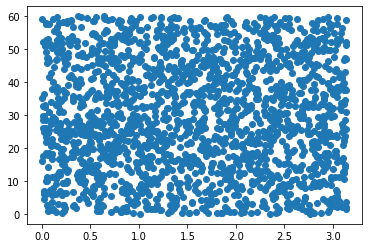

In [254]:
plt.scatter(x,y)

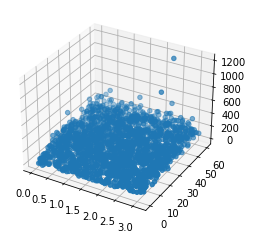

In [255]:
fig = plt.figure()
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
# plotting
ax.scatter(x, y, z, 'green')
ax.set_title('')
plt.show()

In [256]:
from scipy.interpolate import griddata

points = np.zeros((len(x), 2))
points[:, 0] = x
points[:, 1] = y
values = z
# grid_x, grid_y = np.meshgrid(np.linspace(-np.pi, np.pi, 100), np.linspace(0, 60, 100))
grid_x, grid_y = np.meshgrid(np.linspace(0, np.pi, 100), np.linspace(0, 60, 100))

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

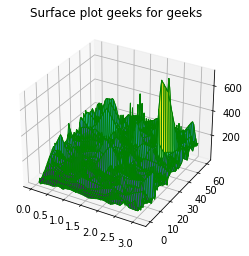

In [257]:
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z1, cmap='viridis',\
                edgecolor='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()

# Sweet ratio
What is the init_pos_dist that gives the best when init_ori_dist is close to np.pi/2 ?

close = +- 10 degrees

In [258]:
eps = 5 * (np.pi/180)
center = np.pi/2
id_l = []
for i in range(len(x)):
    if abs(x[i] - center) <= eps:
        if y[i] < 15:
            id_l.append(i)
len(id_l)

20

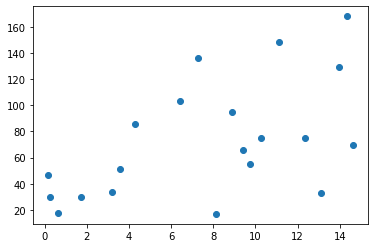

In [259]:
plt.scatter(y[id_l], z[id_l])

# Quadrants
Divide the data in quadrants, average the results and plot.

Q is defined by the boundaries
Go through all the points, check if it inside a Q, add it to Q list.
Each Q has an id = position in the numpy array that stores it = (i,j)
First find i then j


In [260]:
rng_len = 10
# x_rng = np.linspace(-np.pi, np.pi, rng_len)
x_rng = np.linspace(0, np.pi, rng_len)
y_rng = np.linspace(0, 60, rng_len)

grid_x, grid_y = np.meshgrid(x_rng, y_rng)
z_d = {}
for i in range(len(x_rng)):
    for j in range(len(y_rng)):
        z_d[(i,j)] = []

In [261]:
for p_i in range(len(x)):
    # Find the quadrant x
    x_i = -1
    for i in range(len(x_rng)-1):
        if x[p_i] > x_rng[i] and x[p_i] <= x_rng[i+1]:
            x_i = i
            break
    assert x_i != -1, f'x={x[p_i]} not found in range'
    # Find the quadrant y
    y_i = -1
    for i in range(len(y_rng)-1):
        if y[p_i] > y_rng[i] and y[p_i] <= y_rng[i+1]:
            y_i = i
            break
    assert y_i != -1, f'x={y[p_i]} not found in range'
    z_d[(x_i, y_i)].append(z[p_i])

In [262]:
# Agregate
z_mean = np.ones((len(x_rng), len(y_rng)))*-1
for i in range(len(x_rng)):
    for j in range(len(y_rng)):
        #assert len(z_d[(i,j)]) > 0, f'{i},{j} not filled'
#         z_mean[i, j] = np.array(z_d[(i,j)]).mean()
        z_mean[i, j] = np.median(np.array(z_d[(i,j)]))

/Users/zeba/opt/anaconda3/envs/drl/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/zeba/opt/anaconda3/envs/drl/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [279]:
z_d[(1,0)]

[17, 103, 40, 81, 47, 24, 48, 116, 7, 14, 60, 79, 21, 56, 7, 25, 14]

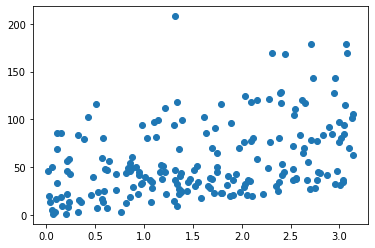

In [271]:
tst_df = aux_df[aux_df['init_pos_dist'] < 6.67]
plt.scatter(tst_df['init_ori_dist'].apply(abs), tst_df['episode_length'])

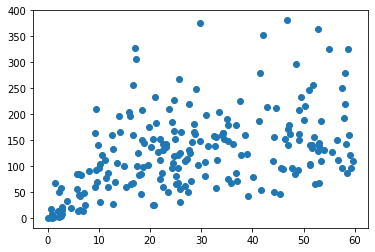

In [280]:
tst_df = aux_df[aux_df['init_ori_dist'].apply(abs) < 0.35]
plt.scatter(tst_df['init_pos_dist'], tst_df['episode_length'])

In [274]:
grid_x

array([[0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265],
       [0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265],
       [0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265],
       [0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265],
       [0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265],
       [0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265],
       [0.        , 0.34906585, 0.6981317 , 1.04719755, 1.3962634 ,
        1.74532925, 2.0943951 , 2.44346095, 2.7925268 , 3.14159265],
       [0.        , 0.34906585, 0.6981317

In [267]:
grid_y

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
         6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667],
       [13.33333333, 13.33333333, 13.33333333, 13.33333333, 13.33333333,
        13.33333333, 13.33333333, 13.33333333, 13.33333333, 13.33333333],
       [20.        , 20.        , 20.        , 20.        , 20.        ,
        20.        , 20.        , 20.        , 20.        , 20.        ],
       [26.66666667, 26.66666667, 26.66666667, 26.66666667, 26.66666667,
        26.66666667, 26.66666667, 26.66666667, 26.66666667, 26.66666667],
       [33.33333333, 33.33333333, 33.33333333, 33.33333333, 33.33333333,
        33.33333333, 33.33333333, 33.33333333, 33.33333333, 33.33333333],
       [40.        , 40.        , 40.        , 40.        , 40.        ,
        40.        , 40.        , 40.        

In [263]:
z_mean

array([[ 20. ,  89.5, 135.5, 126. , 139.5, 152. , 131. , 148. , 146.5,
          nan],
       [ 40. ,  64. , 104. ,  91. , 126.5, 122. , 136.5, 147.5, 156. ,
          nan],
       [ 43. ,  53. ,  86. ,  96. , 120. , 133. , 154.5, 157. , 157.5,
          nan],
       [ 42.5,  56. ,  92. ,  98. , 123.5, 148.5, 150. , 137. , 139.5,
          nan],
       [ 38. ,  66. ,  85. , 104. , 131. , 123. , 127. , 112. , 161. ,
          nan],
       [ 36. ,  72. ,  84.5, 135. , 116. , 135. , 131.5, 140.5, 182.5,
          nan],
       [ 67. ,  94. , 105. , 101. , 143.5, 125. , 154. , 141.5, 198. ,
          nan],
       [ 70. ,  73. ,  78. , 115. , 107. , 113. , 151. , 163. , 166. ,
          nan],
       [ 84.5, 121. ,  99. ,  94. , 136. , 131. , 140. , 174. , 159. ,
          nan],
       [  nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,   nan,
          nan]])

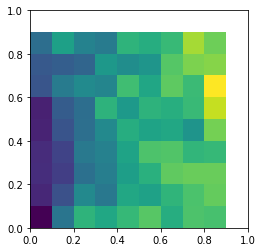

In [264]:
plt.imshow(z_mean, extent=(0,1,0,1), origin='lower')

In [107]:
x_rng

array([-3.14159265, -3.07812614, -3.01465962, -2.9511931 , -2.88772658,
       -2.82426006, -2.76079354, -2.69732703, -2.63386051, -2.57039399,
       -2.50692747, -2.44346095, -2.37999443, -2.31652792, -2.2530614 ,
       -2.18959488, -2.12612836, -2.06266184, -1.99919533, -1.93572881,
       -1.87226229, -1.80879577, -1.74532925, -1.68186273, -1.61839622,
       -1.5549297 , -1.49146318, -1.42799666, -1.36453014, -1.30106362,
       -1.23759711, -1.17413059, -1.11066407, -1.04719755, -0.98373103,
       -0.92026451, -0.856798  , -0.79333148, -0.72986496, -0.66639844,
       -0.60293192, -0.53946541, -0.47599889, -0.41253237, -0.34906585,
       -0.28559933, -0.22213281, -0.1586663 , -0.09519978, -0.03173326,
        0.03173326,  0.09519978,  0.1586663 ,  0.22213281,  0.28559933,
        0.34906585,  0.41253237,  0.47599889,  0.53946541,  0.60293192,
        0.66639844,  0.72986496,  0.79333148,  0.856798  ,  0.92026451,
        0.98373103,  1.04719755,  1.11066407,  1.17413059,  1.23

In [92]:
grid_z1

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

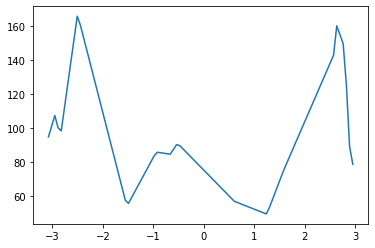

In [97]:
# Plotting slices
plt.plot(grid_x[10], grid_z1[10])

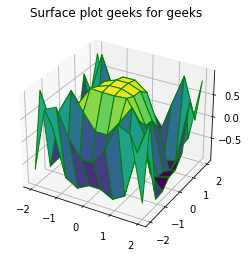

In [27]:
x = np.outer(np.linspace(-2, 2, 10), np.ones(10))
y = x.copy().T
z = np.cos(x ** 2 + y ** 3)
 
fig = plt.figure()
 
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
 
# syntax for plotting
ax.plot_surface(x, y, z, cmap='viridis',\
                edgecolor='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()

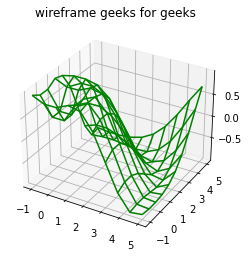

In [32]:
# function for z axis
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))
 
# x and y axis
x = np.linspace(-1, 5, 10)
y = np.linspace(-1, 5, 10)
  
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
 
fig = plt.figure()
ax = plt.axes(projection ='3d')
ax.plot_wireframe(X, Y, Z, color ='green')
ax.set_title('wireframe geeks for geeks');

In [39]:
X.shape

(10, 10)

In [51]:
X.shape

(10, 10)

In [52]:
np.mgrid[0:5, 0:5].shape

(2, 5, 5)

In [41]:
Y

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ],
       [-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333],
       [ 0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333,
         0.33333333,  0.33333333,  0.33333333,  0.33333333,  0.33333333],
       [ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [ 1.66666667,  1.66666667,  1.66666667,  1.66666667,  1.66666667,
         1.66666667,  1.66666667,  1.66666667,  1.66666667,  1.66666667],
       [ 2.33333333,  2.33333333,  2.33333333,  2.33333333,  2.33333333,
         2.33333333,  2.33333333,  2.33333333,  2.33333333,  2.33333333],
       [ 3.        ,  3.        ,  3.        ,  3.        ,  3.        ,
         3.        ,  3.        ,  3.        

In [56]:
from scipy.interpolate import griddata

# defining all 3 axis
aux_df = df[(df['object'] == 'Rectangle') & (aux_df['success'])]
z = aux_df['episode_length']
x = aux_df['init_ori_dist']
y = aux_df['init_pos_dist']

points = np.zeros((len(x), 2))
points[:, 0] = x
points[:, 1] = y
values = z
grid_x, grid_y = np.meshgrid(np.linspace(-np.pi, np.pi, 10), np.linspace(0, 60, 10))

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

In [83]:
grid_x

array([[-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
         0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265],
       [-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
         0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265],
       [-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
         0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265],
       [-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
         0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265],
       [-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
         0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265],
       [-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
         0.34906585,  1.04719755,  1.74532925,  2.44346095,  3.14159265],
       [-3.14159265, -2.44346095, -1.74532925, -1.04719755, -0.34906585,
         0.34906585,  1.04719755,  1.74532925

In [85]:
grid_y

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667,
         6.66666667,  6.66666667,  6.66666667,  6.66666667,  6.66666667],
       [13.33333333, 13.33333333, 13.33333333, 13.33333333, 13.33333333,
        13.33333333, 13.33333333, 13.33333333, 13.33333333, 13.33333333],
       [20.        , 20.        , 20.        , 20.        , 20.        ,
        20.        , 20.        , 20.        , 20.        , 20.        ],
       [26.66666667, 26.66666667, 26.66666667, 26.66666667, 26.66666667,
        26.66666667, 26.66666667, 26.66666667, 26.66666667, 26.66666667],
       [33.33333333, 33.33333333, 33.33333333, 33.33333333, 33.33333333,
        33.33333333, 33.33333333, 33.33333333, 33.33333333, 33.33333333],
       [40.        , 40.        , 40.        , 40.        , 40.        ,
        40.        , 40.        , 40.        

In [84]:
grid_z0

array([[ 62,  62,  62,   1,   1,   1,  65,  57,  57,  57],
       [108,  65,  65,  91,  91,  91,  57,  57,  72, 203],
       [179, 179, 179,  75,  75,  75,  50, 124,  68,  68],
       [151,  89, 129, 129,  64,  64, 145,  59,  59,  60],
       [ 59, 125, 125, 201, 163,  42, 179, 155, 155, 236],
       [384, 384, 124,  95,  95, 165, 165, 165, 158, 158],
       [148,  84,  84, 216, 216,  97,  99,  85, 151, 263],
       [179, 179,  96,  96,  80,  80,  77, 220, 134, 134],
       [144, 144, 200, 317,  87,  78, 173,  71, 124, 215],
       [139, 139,  91,  87, 195, 195, 409, 409, 326, 197]])

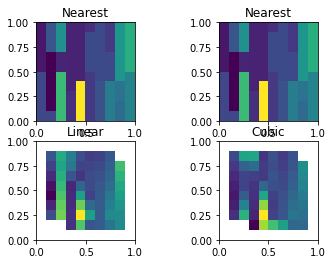

In [64]:
extent = (0, 1, 0, 1)

plt.subplot(221)
plt.imshow(grid_z0.T, extent=extent, origin='lower')
plt.title('Nearest')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=extent, origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=extent, origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=extent, origin='lower')
plt.title('Cubic')
# plt.gcf().set_size_inches(6, 6)
plt.show()

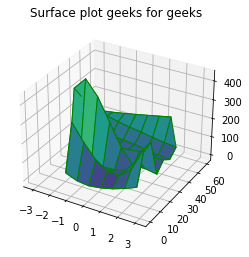

In [70]:
# syntax for plotting
# syntax for 3-D plotting
ax = plt.axes(projection='3d')
ax.plot_surface(grid_x, grid_y, grid_z2, cmap='viridis',\
                edgecolor='green')
ax.set_title('Surface plot geeks for geeks')
plt.show()

In [66]:
Z

array([[ 0.98776595,  0.86945229,  0.86945229,  0.98776595,  0.93129139,
         0.56711727, -0.02068353, -0.6123203 , -0.96504858, -0.92618484],
       [ 0.86945229,  0.45413806,  0.45413806,  0.86945229,  0.99170687,
         0.70652097,  0.12282004, -0.51430268, -0.9336754 , -0.95571697],
       [ 0.86945229,  0.45413806,  0.45413806,  0.86945229,  0.99170687,
         0.70652097,  0.12282004, -0.51430268, -0.9336754 , -0.95571697],
       [ 0.98776595,  0.86945229,  0.86945229,  0.98776595,  0.93129139,
         0.56711727, -0.02068353, -0.6123203 , -0.96504858, -0.92618484],
       [ 0.93129139,  0.99170687,  0.99170687,  0.93129139,  0.70652097,
         0.27072964, -0.28622441, -0.77460439, -0.99757939, -0.84827672],
       [ 0.56711727,  0.70652097,  0.70652097,  0.56711727,  0.27072964,
        -0.15757945, -0.6123203 , -0.9336754 , -0.97819348, -0.69292418],
       [-0.02068353,  0.12282004,  0.12282004, -0.02068353, -0.28622441,
        -0.6123203 , -0.89168225, -0.99968331

In [94]:
grid_z0

array([[ 62,  62,  62, ...,  57,  57,  57],
       [ 28,  28,  28, ...,  57,  57,  57],
       [ 28,  28,  28, ...,  57,  57,  57],
       ...,
       [351, 351, 351, ..., 108, 108, 108],
       [251, 139, 139, ..., 197, 197, 197],
       [139, 139, 139, ..., 197, 197, 197]])